# GRIP: THE SPARKS FOUNDATION                 

## DATASCIENCE AND BUSINESS ANALYTICS INTERN


#### Author- MAYANK SINHA

### TASK : EXPLORATORY DATA  ANALYSIS - GLOBAL TERRORISM

###  Problem Statement:  As a security/defense analyst, try to find out the hot zone of terrorism.
### what all security issues and insights you can derive by EDA?


 #### Importing required libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

####  Load the dataset


In [2]:
terr_dataset=pd.read_csv("C:/Users/Mayank PC/Desktop/globalterrorismdb_0718dist.csv",encoding='latin1')
terr_dataset.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
terr_dataset.shape

(181691, 135)

#### listing out all the column names after converting it into a list

In [8]:
print("Column Names in Terrorism DataSet:\n")
for i in terr_dataset.columns.tolist():
    print(i)

Column Names in Terrorism DataSet:

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubty

##### when looked into the data, found certain column and its data which are missing or irrelevant.
#### Creating a new dataset from the exisitng one, with non empty features for analysis, 
#### selected 14 of the columns which made sense

In [9]:
terr_dataset_final =terr_dataset[['iyear','imonth','iday','country_txt','region_txt','provstate','attacktype1_txt',
                                  'targtype1_txt','target1','weaptype1_txt','nkill','nwound','gname','summary']]
terr_dataset_final.rename(columns={"iyear":"Year",
                                   "imonth":"Month",
                                   "iday":"Day",
                                   "country_txt":"Country",
                                   "region_txt":"Region",
                                   "provstate":"State",
                                   "attacktype1_txt":"Attacktype",
                                   "targtype1_txt":"target_type",
                                   "target1":"target",
                                   "weaptype1_txt":"Weapon_type",
                                   "nkill":"No_of_Killed",
                                   "nwound":"No_of_Wounded",
                                   "gname":"Group"},inplace=True)
terr_dataset_final.sample(6)

,Year,Month,Day,Country,Region,State,Attacktype,target_type,target,Weapon_type,No_of_Killed,No_of_Wounded,Group,summary
52716,1992,8,26,Colombia,South America,Meta,Armed Assault,Private Citizens & Property,Town of San Juan de Arama,Firearms,1.0,9.0,Revolutionary Armed Forces of Colombia (FARC),NaN
55852,1994,4,7,Rwanda,Sub-Saharan Africa,Kigali,Assassination,Government (General),First Vice President Felicien Ngango,Firearms,1.0,0.0,Unknown,NaN
94527,2009,11,29,Iraq,Middle East & North Africa,Baghdad,Bombing/Explosion,Private Citizens & Property,Civilians,Explosives,0.0,2.0,Unknown,"11/29/2009: On Sunday evening, a bomb detonate..."
131041,2014,4,29,Central African Republic,Sub-Saharan Africa,Bangui,Assassination,Journalists & Media,Journalist: Desire Sayenga,Firearms,1.0,0.0,Unknown,04/29/2014: Assailants shot and killed Desire ...
133352,2014,6,12,France,Western Europe,Corsica,Facility/Infrastructure Attack,Police,Building,Firearms,0.0,0.0,Unknown,06/12/2014: Assailants opened fire on a police...
153488,2015,9,24,Nigeria,Sub-Saharan Africa,Borno,Hostage Taking (Kidnapping),Private Citizens & Property,Civilians,Unknown,NaN,NaN,Boko Haram,09/24/2015: Assailants abducted seven civilian...


In [10]:
terr_dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           181691 non-null  int64  
 1   Month          181691 non-null  int64  
 2   Day            181691 non-null  int64  
 3   Country        181691 non-null  object 
 4   Region         181691 non-null  object 
 5   State          181270 non-null  object 
 6   Attacktype     181691 non-null  object 
 7   target_type    181691 non-null  object 
 8   target         181055 non-null  object 
 9   Weapon_type    181691 non-null  object 
 10  No_of_Killed   171378 non-null  float64
 11  No_of_Wounded  165380 non-null  float64
 12  Group          181691 non-null  object 
 13  summary        115562 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 19.4+ MB


In [11]:
terr_dataset_final.describe()

,Year,Month,Day,No_of_Killed,No_of_Wounded
count,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,2.403272,3.167668
std,13.259430,3.388303,8.814045,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000


#### Data Cleaning


In [12]:
terr_dataset_final.isnull().sum()

Year                 0
Month                0
Day                  0
Country              0
Region               0
State              421
Attacktype           0
target_type          0
target             636
Weapon_type          0
No_of_Killed     10313
No_of_Wounded    16311
Group                0
summary          66129
dtype: int64

In [13]:
# Missing values fill -
# 1. No of Killed =
terr_dataset_final['No_of_Killed'].head()

0    1.0
1    0.0
2    1.0
3    NaN
4    NaN
Name: No_of_Killed, dtype: float64

In [14]:
terr_dataset_final['No_of_Killed']=terr_dataset_final['No_of_Killed'].fillna(0)
terr_dataset_final['No_of_Killed'].head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: No_of_Killed, dtype: float64

In [15]:
terr_dataset_final.isnull().sum()

Year                 0
Month                0
Day                  0
Country              0
Region               0
State              421
Attacktype           0
target_type          0
target             636
Weapon_type          0
No_of_Killed         0
No_of_Wounded    16311
Group                0
summary          66129
dtype: int64

In [16]:
#2. No_of_Wounded 
terr_dataset_final['No_of_Wounded']=terr_dataset_final['No_of_Wounded'].fillna(0)
terr_dataset_final.isnull().sum()

Year                 0
Month                0
Day                  0
Country              0
Region               0
State              421
Attacktype           0
target_type          0
target             636
Weapon_type          0
No_of_Killed         0
No_of_Wounded        0
Group                0
summary          66129
dtype: int64

In [17]:
terr_dataset_final['target']=terr_dataset_final['target'].fillna("Not Known")
terr_dataset_final.isnull().sum()

Year                 0
Month                0
Day                  0
Country              0
Region               0
State              421
Attacktype           0
target_type          0
target               0
Weapon_type          0
No_of_Killed         0
No_of_Wounded        0
Group                0
summary          66129
dtype: int64

In [ ]:
terr_dataset_final['summary']=terr_dataset_final['summary'].fillna("Not Known")
terr_dataset_final.isnull().sum()

In [18]:
terr_dataset_final.shape

(181691, 14)

In [19]:
terr_dataset_final.duplicated().sum()

10146

In [20]:
# since we have 10146 duplicate values we can drop them
terr_dataset_final=terr_dataset_final.drop_duplicates()

In [21]:
terr_dataset_final.shape

(171545, 14)

In [22]:
#checking number of unique values in each column
terr_dataset_final.nunique()

Year                 47
Month                13
Day                  32
Country             205
Region               12
State              2855
Attacktype            9
target_type          22
target            86007
Weapon_type          12
No_of_Killed        205
No_of_Wounded       238
Group              3537
summary          112492
dtype: int64

#### EDA(Exploratory Data Analysis)

In [23]:
#Most affected by terroism
terr_dataset_final["Country"].value_counts()[:10]

Iraq              23440
Pakistan          13787
Afghanistan       12486
India             11557
Colombia           7486
Philippines        6762
Peru               5031
United Kingdom     4962
El Salvador        4176
Somalia            4121
Name: Country, dtype: int64

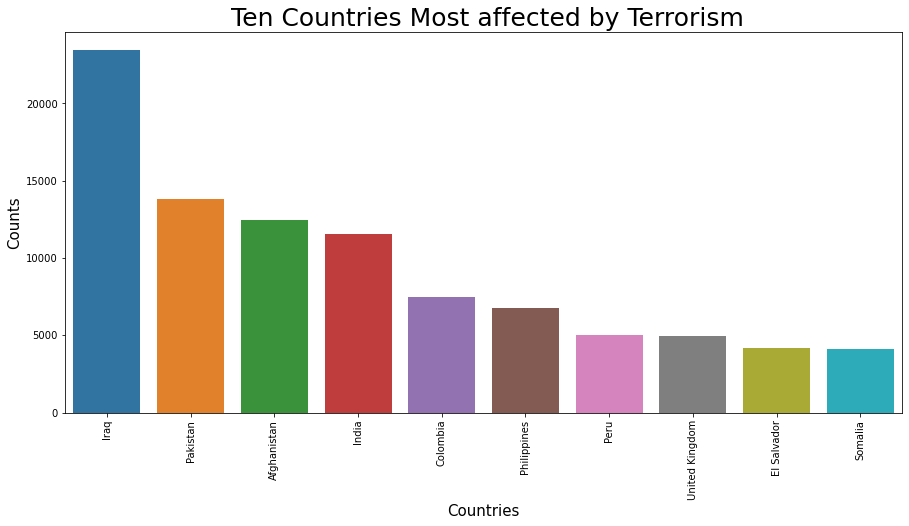

In [24]:
# Plotting the information graphically:

plt.figure(figsize=(15,7))
sns.barplot(x=terr_dataset_final["Country"].value_counts()[:10].index,y=terr_dataset_final["Country"].value_counts()[:10].values,data=terr_dataset_final)
plt.title(" Ten Countries Most affected by Terrorism",fontsize=25)
plt.xlabel("Countries",fontsize=15)
plt.ylabel("Counts",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [32]:
# Number of attacks every month in Iraq for the years i.e. 1970 - 2017
Iraq_month=terr_dataset_final.query("Country=='Iraq'").groupby('Month').mean()
Iraq_month['Day']

Month
1     15.956591
2     14.937206
3     15.751384
4     14.984383
5     16.383422
6     14.747363
7     15.323278
8     15.271196
9     16.252549
10    16.383673
11    15.859426
12    15.778409
Name: Day, dtype: float64

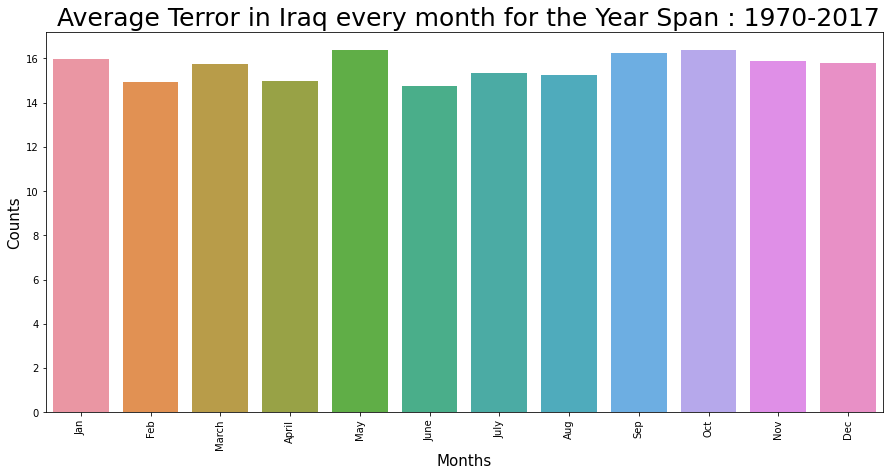

In [33]:
# Plotting the information graphically:

plt.figure(figsize=(15,7))
sns.barplot(x=['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'],y=Iraq_month['Day'],data=Iraq_month)
plt.title(" Average Terror in Iraq every month for the Year Span : 1970-2017",fontsize=25)
plt.xlabel("Months",fontsize=15)
plt.ylabel("Counts",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [34]:
# Region

Region=terr_dataset_final.groupby('Region')['Year'].count().sort_values(ascending=False).reset_index(name='Count')

Region

,Region,Count
0,Middle East & North Africa,48660
1,South Asia,43461
2,Sub-Saharan Africa,17060
3,South America,16528
4,Western Europe,15031
5,Southeast Asia,12057
6,Central America & Caribbean,8852
7,Eastern Europe,5007
8,North America,3349
9,East Asia,714


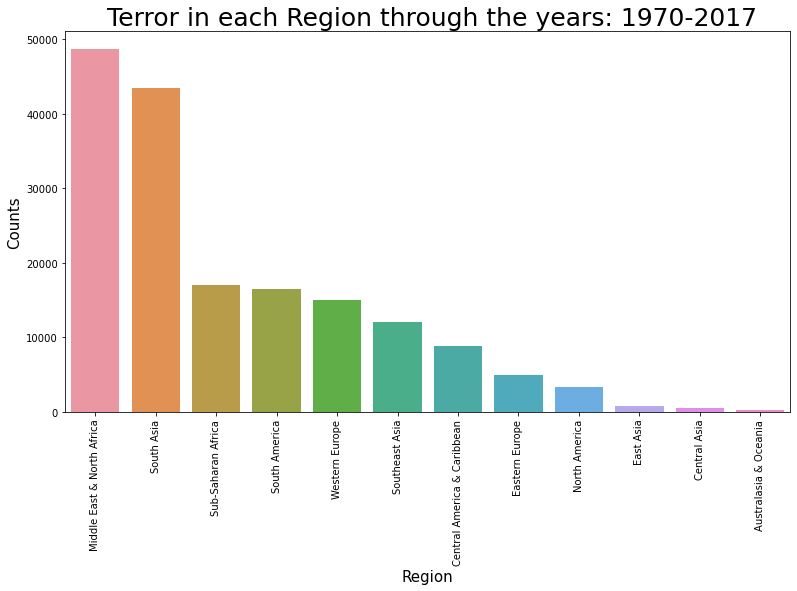

In [36]:
# Plotting the information graphically:

plt.figure(figsize=(13,7))
sns.barplot(x='Region',y='Count',data=Region)
plt.title(" Terror in each Region through the years: 1970-2017",fontsize=25)
plt.xlabel("Region",fontsize=15)
plt.ylabel("Counts",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [37]:
# Analysing the Attack Types:
Attacktype=terr_dataset_final["Attacktype"].value_counts().sort_values(ascending=False).reset_index(name='Count')
Attacktype

,index,Count
0,Bombing/Explosion,81858
1,Armed Assault,41129
2,Assassination,18872
3,Hostage Taking (Kidnapping),10968
4,Facility/Infrastructure Attack,9283
5,Unknown,6911
6,Hostage Taking (Barricade Incident),939
7,Unarmed Assault,932
8,Hijacking,653


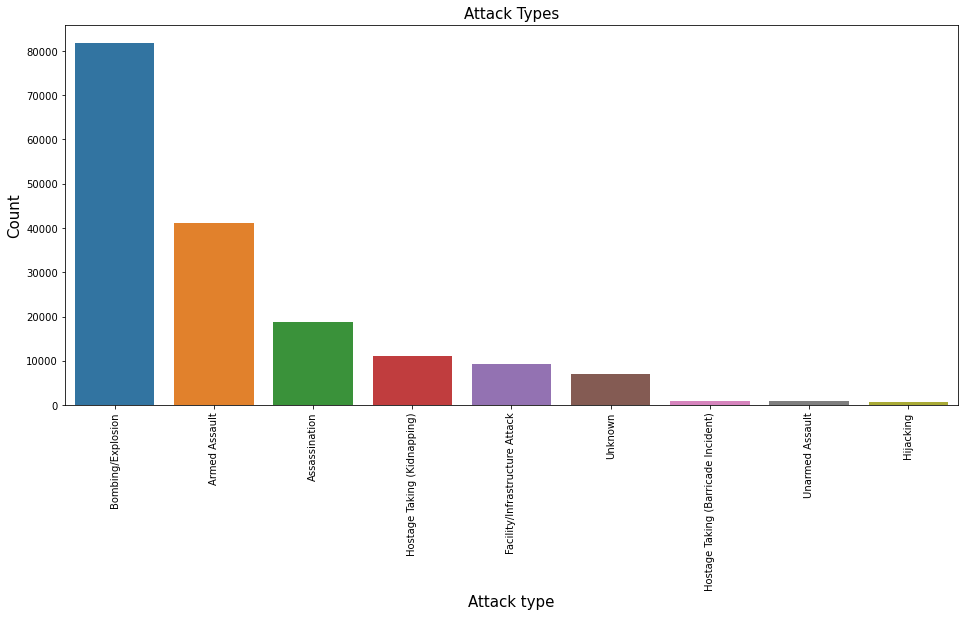

In [40]:
plt.figure(figsize=(16,7))
sns.barplot(x=Attacktype['index'],y=Attacktype['Count'])
plt.title("Attack Types",fontsize=15)
plt.xlabel("Attack type",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Analysing the number of attacks that took place every year

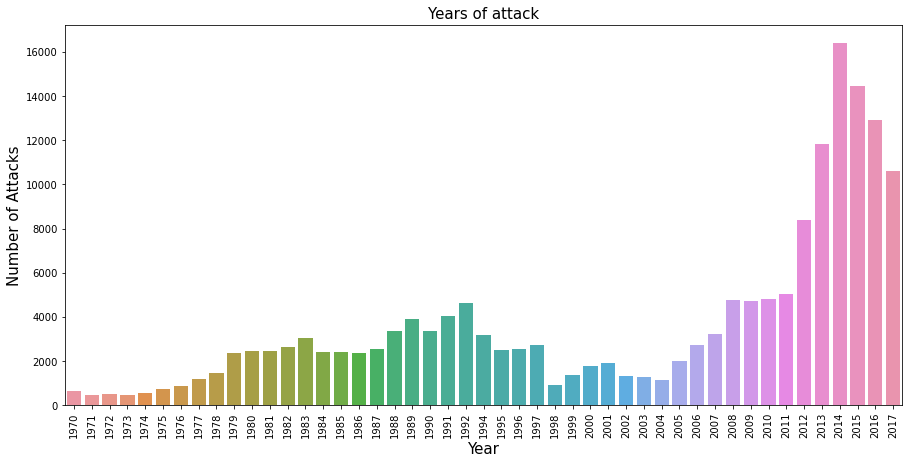

In [41]:
years = terr_dataset_final['Year'].unique()
count_of_years = terr_dataset_final['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (15,7))
sns.barplot(x = years,y = count_of_years)
plt.xticks(rotation = 90)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.title('Years of attack',fontsize=15)
plt.show()

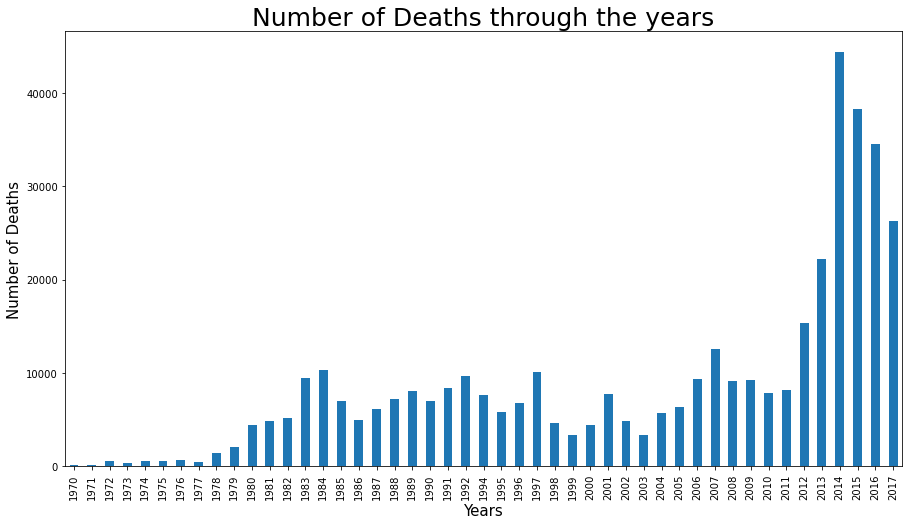

In [42]:
# Analysing the number of deaths taken place in each year.
plt.figure(figsize=(15,8))
terr_dataset_final.groupby(['Year'])['No_of_Killed'].sum().plot(kind='bar')
plt.title('Number of Deaths through the years',fontsize=25)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Deaths',fontsize=15)
plt.xticks(rotation=90)
plt.show()

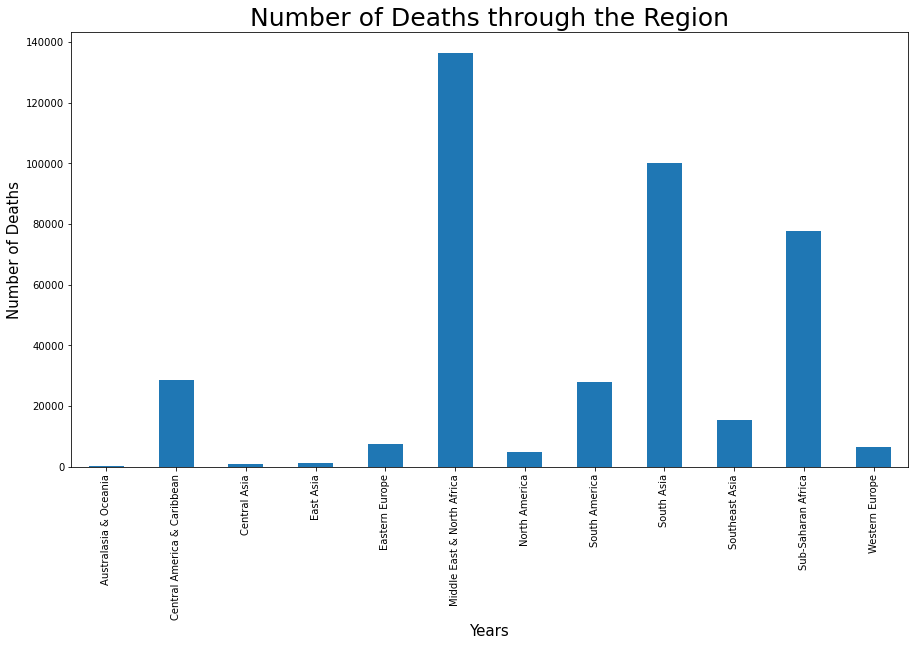

In [43]:
# Analysing the number of deaths taken place in particular region.
plt.figure(figsize=(15,8))
terr_dataset_final.groupby(['Region'])['No_of_Killed'].sum().plot(kind='bar')
plt.title('Number of Deaths through the Region',fontsize=25)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Deaths',fontsize=15)
plt.xticks(rotation=90)
plt.show()

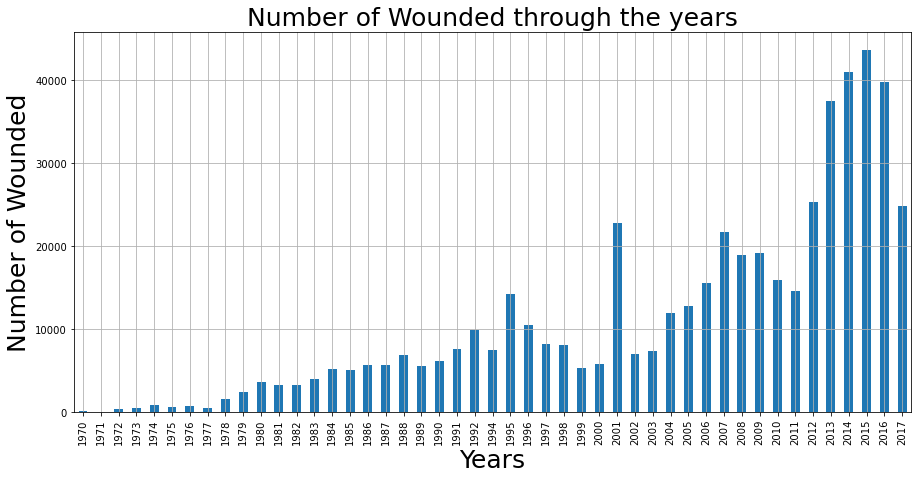

In [46]:
# Analysing the number of Wounded taken place in each year.
plt.figure(figsize = (15,7))
terr_dataset_final.groupby(['Year'])['No_of_Wounded'].sum().plot(kind='bar')
plt.title('Number of Wounded through the years',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.ylabel('Number of Wounded',fontsize=25)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [47]:
#Analysis regarding target type affected by attack
target=terr_dataset_final["target_type"].value_counts().sort_values(ascending=False).reset_index(name='Count')
target

,index,Count
0,Private Citizens & Property,41395
1,Military,27386
2,Police,23761
3,Government (General),20454
4,Business,18827
5,Transportation,6089
6,Unknown,5203
7,Religious Figures/Institutions,4284
8,Educational Institution,4173
9,Utilities,4106


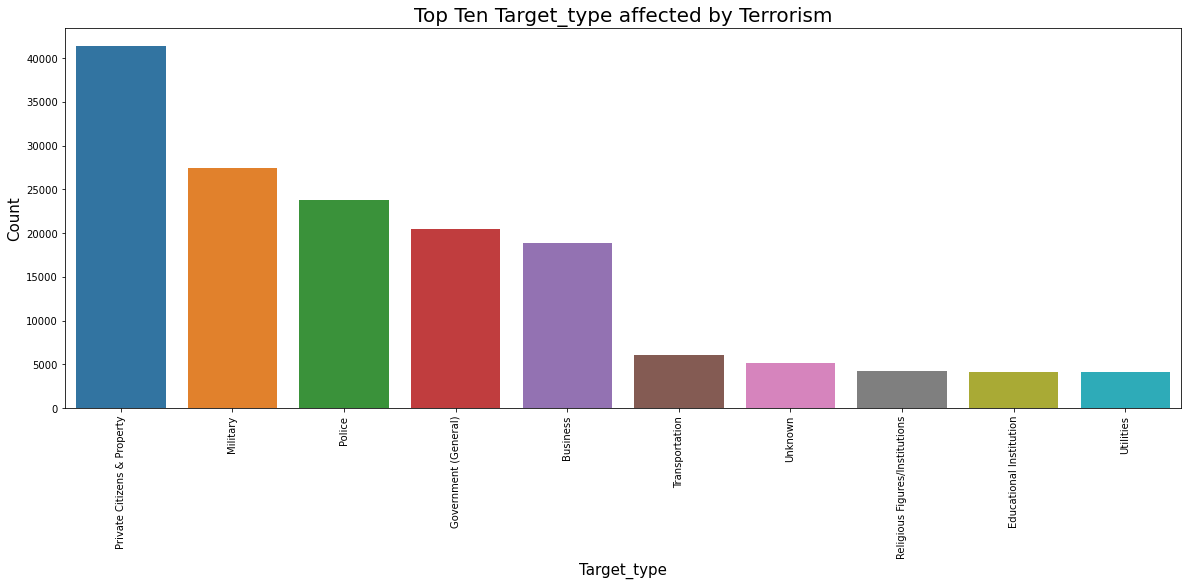

In [48]:
plt.figure(figsize=(20,7))
sns.barplot(x=target["index"][:10],y=target["Count"][:10])
plt.title("Top Ten Target_type affected by Terrorism",fontsize=20)
plt.xlabel("Target_type",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

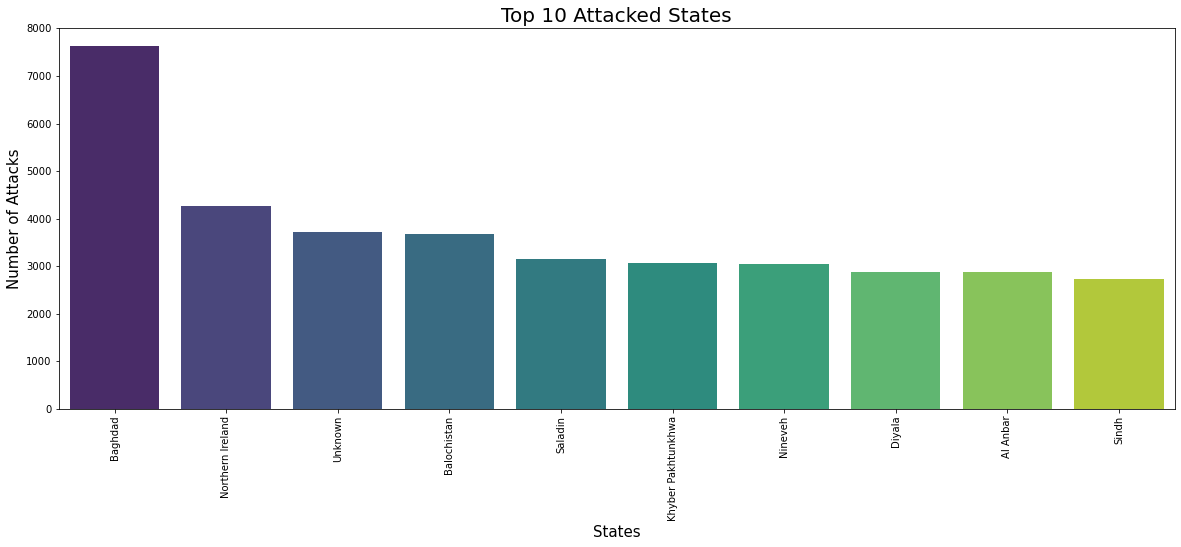

In [49]:
# ANALYSIS FOR STATES
# States that were attacked the most
plt.figure(figsize=(20,7))
sns.barplot(x=terr_dataset_final['State'].value_counts().head(10).index,y=terr_dataset_final['State'].value_counts().head(10).values,palette="viridis")
plt.title('Top 10 Attacked States',fontsize=20)
plt.xlabel('States',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=90)
plt.show()

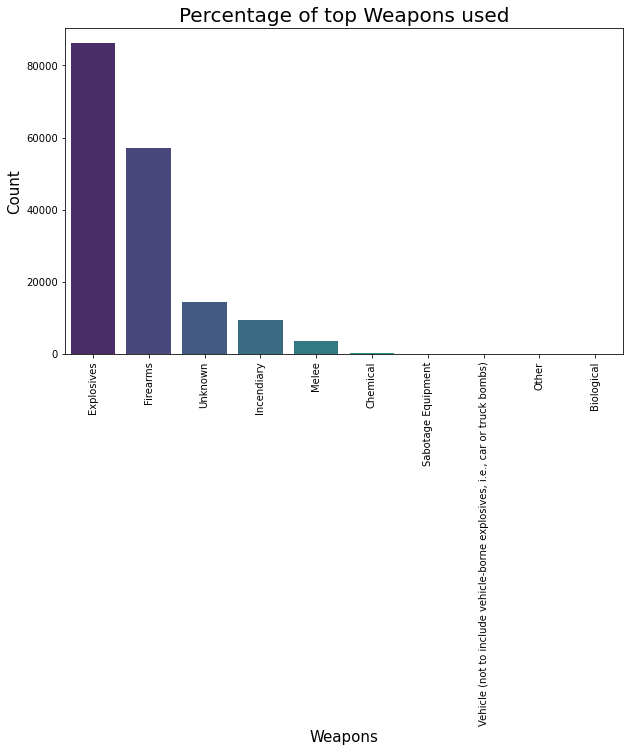

In [50]:
# Plotting the top 10 weapons used by the terrorists:

plt.figure(figsize=(10,6))
sns.barplot(x=terr_dataset_final["Weapon_type"].value_counts()[:10].index,y=terr_dataset_final["Weapon_type"].value_counts()[:10].values,palette="viridis")
plt.title("Percentage of top Weapons used",fontsize=20)
plt.xlabel("Weapons",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

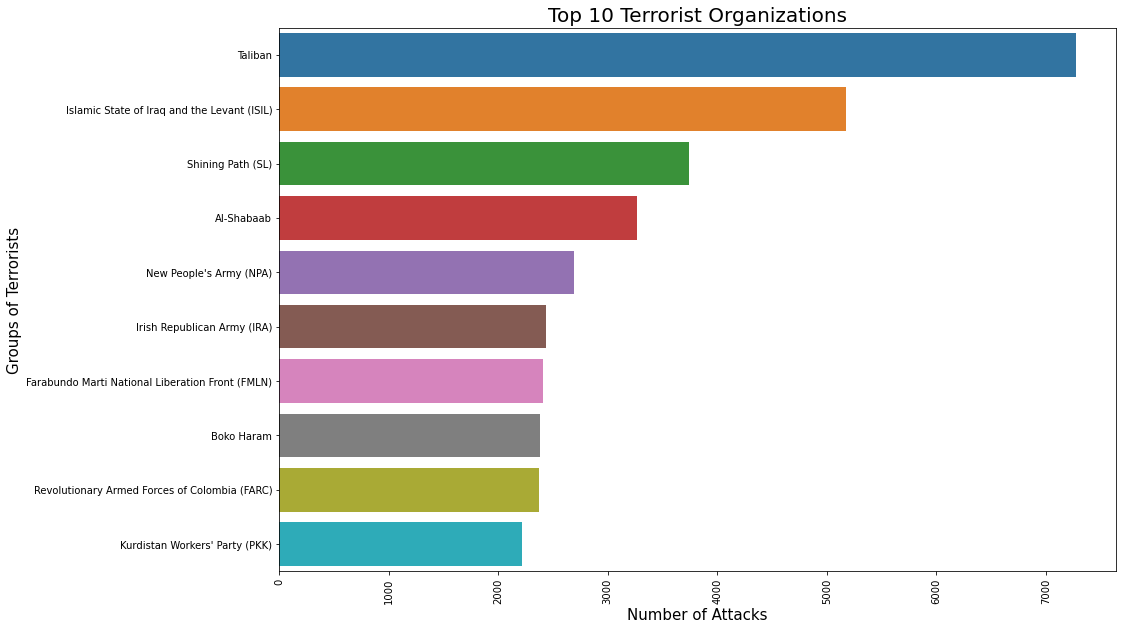

In [58]:
#top ten terrorist organisation 
plt.figure(figsize=(15,10))
sns.barplot(x=terr_dataset_final['Group'].value_counts()[1:11].values, y=terr_dataset_final['Group'].value_counts()[1:11].index)
plt.title('Top 10 Terrorist Organizations',fontsize=20)
plt.xlabel('Number of Attacks',fontsize=15)
plt.ylabel('Groups of Terrorists',fontsize=15)
plt.xticks(rotation=90)
plt.show()

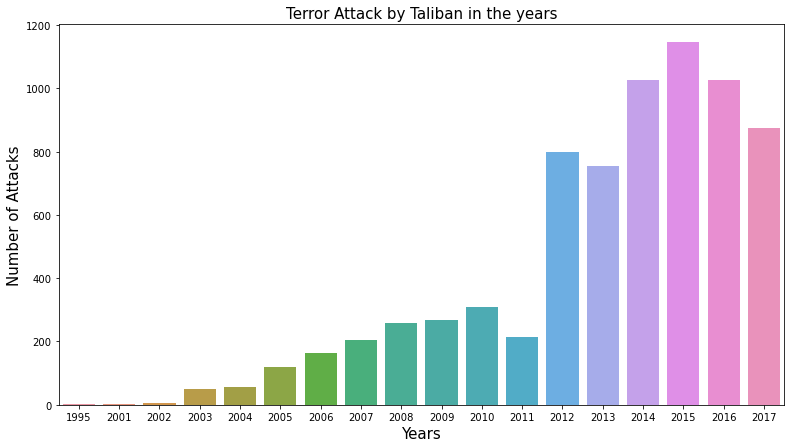

In [55]:
terr_Taliban = terr_dataset_final[terr_dataset_final["Group"]=="Taliban"]
# Let us plot the attacks over the years made by Taliban:

plt.figure(figsize = (13,7))
sns.barplot(x=terr_Taliban['Year'].value_counts().index,y=terr_Taliban['Year'].value_counts().values)
plt.title('Terror Attack by Taliban in the years',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.show()

INSIGHTS -
Taliban is the most dangerous terrorist group followed by ISIL